In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
loans = pd.read_csv('loan_data.csv')

In [4]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


<h3> Data Exploration

In [5]:
# The types of each attribute in the dataset
loans.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

In [6]:
# Dimensions of the dataset
loans.shape

(9578, 14)

In [7]:
# Mean of all attributes
loans.mean()

credit.policy            0.804970
int.rate                 0.122640
installment            319.089413
log.annual.inc          10.932117
dti                     12.606679
fico                   710.846314
days.with.cr.line     4560.767197
revol.bal            16913.963876
revol.util              46.799236
inq.last.6mths           1.577469
delinq.2yrs              0.163708
pub.rec                  0.062122
not.fully.paid           0.160054
dtype: float64

In [8]:
# Median of all attributes
loans.median()

credit.policy           1.000000
int.rate                0.122100
installment           268.950000
log.annual.inc         10.928884
dti                    12.665000
fico                  707.000000
days.with.cr.line    4139.958333
revol.bal            8596.000000
revol.util             46.300000
inq.last.6mths          1.000000
delinq.2yrs             0.000000
pub.rec                 0.000000
not.fully.paid          0.000000
dtype: float64

In [9]:
# Mode of all attributes
loans.mode()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1253,317.72,11.0021,0.0,687,3660.0,0,0.0,0,0,0,0


<h4>The ratio between loans paid back fully or not.

Positive examples = 1533
Negative examples = 8045
Proportion of positive to negative examples = 19.06%


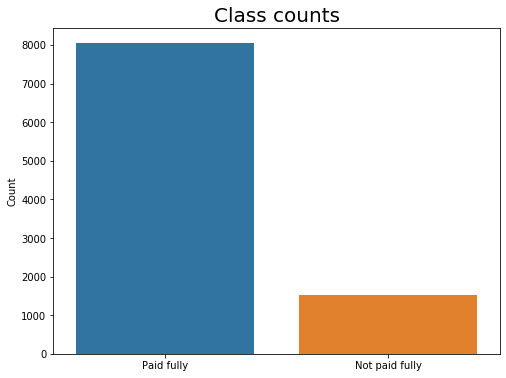

In [10]:
# Get number of positve and negative examples
pos = loans[loans["not.fully.paid"] == 1].shape[0]
neg = loans[loans["not.fully.paid"] == 0].shape[0]
print(f"Positive examples = {pos}")
print(f"Negative examples = {neg}")
print(f"Proportion of positive to negative examples = {(pos / neg) * 100:.2f}%")
plt.figure(figsize=(8, 6))
sns.countplot(loans["not.fully.paid"])
plt.xticks((0, 1), ["Paid fully", "Not paid fully"])
plt.xlabel("")
plt.ylabel("Count")
plt.title("Class counts", y=1, fontdict={"fontsize": 20});

<h4>Relationship between the FICO score of the borrower and the Credit Policy (0 or 1) using a Histogram.

Text(0.5, 0, 'FICO')

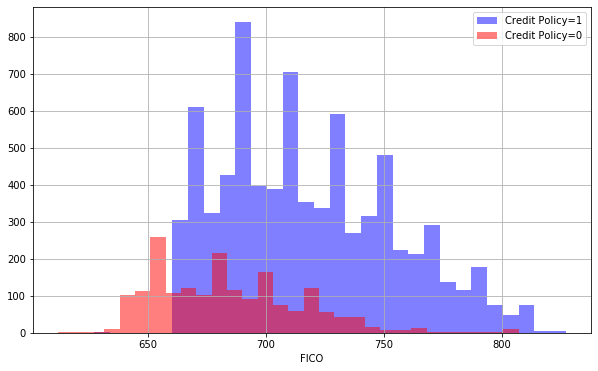

In [11]:
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',bins=30,label='Credit Policy=1')
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',bins=30,label='Credit Policy=0')
plt.legend()
plt.xlabel('FICO')

#Observations
#When credit policy is 1 , the fico score is higher.

<h4>Countplot to check the relationship between the purpose of the loan and the repayment

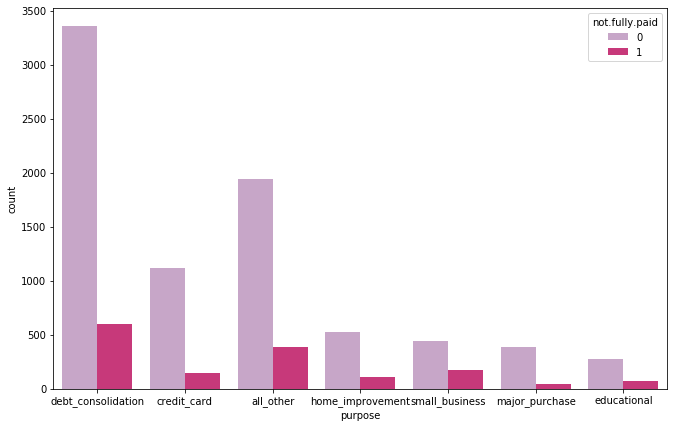

In [12]:
plt.figure(figsize=(11,7))
sns.countplot('purpose',hue='not.fully.paid',data=loans,palette='PuRd')

#Observations
#The Repayment of loans is independent of the purpose , because the ratio is same for almost every purpose.

<h4>Relationship between Interest rate and the FICO Score using a Scatterplot

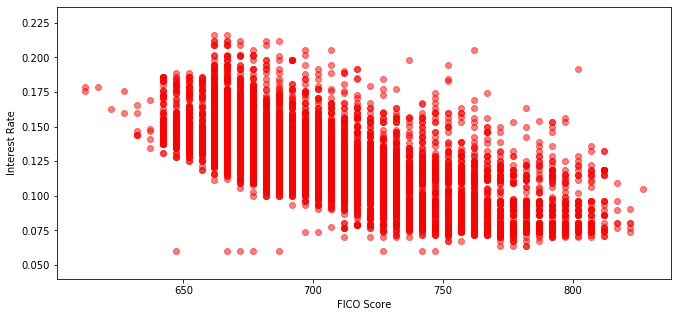

In [13]:

fico = loans['fico']
int_rate = loans['int.rate']
plt.figure(figsize=(11,5))

plt.scatter(fico, int_rate, c='r', alpha=0.5)
plt.xlabel('FICO Score')
plt.ylabel('Interest Rate')
plt.show()

#Observations
#The higher the FICO Score , lesser is the interest rate.
#Good FICO score gives the lender a sense of trust on the borrower.

<h2> Pre Processing

In [14]:
from sklearn import preprocessing

In [15]:
#creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
purpose_encoded=le.fit_transform(loans['purpose'])
print ("Purpose Encoded:" ,purpose_encoded) 

Purpose Encoded: [2 1 2 ... 2 4 2]


In [16]:
loans['purpose_encoded'] = purpose_encoded

In [17]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_encoded
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,2
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,2
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,2
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1


In [18]:
#Checking duplicate rows

loans.duplicated(subset = None, keep = 'first')

0       False
1       False
2       False
3       False
4       False
        ...  
9573    False
9574    False
9575    False
9576    False
9577    False
Length: 9578, dtype: bool

In [19]:
#Checking missing values

loans.isnull()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_encoded
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9574,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9575,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9576,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [20]:
#Data arranged in descending order of the fico score

loans.sort_values(['fico'], axis=0,ascending=False,inplace=True)
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_encoded
1613,1,home_improvement,0.1051,390.09,11.918391,2.92,827,8763.000000,84236,4.6,0,0,0,0,4
2476,1,small_business,0.0800,203.69,10.819778,3.24,822,7260.000000,35624,2.5,0,0,0,0,6
154,1,small_business,0.0901,795.11,10.950807,8.93,822,9696.958333,185,0.5,0,0,0,0,6
1477,1,all_other,0.0800,344.71,10.691945,1.94,822,11579.958330,3879,7.9,2,0,0,0,0
2495,1,debt_consolidation,0.0740,155.30,11.359774,7.92,822,11261.000000,1874,5.5,0,0,0,0,2


                   credit.policy  int.rate  installment  log.annual.inc  \
credit.policy           1.000000 -0.294089     0.058770        0.034906   
int.rate               -0.294089  1.000000     0.276140        0.056383   
installment             0.058770  0.276140     1.000000        0.448102   
log.annual.inc          0.034906  0.056383     0.448102        1.000000   
dti                    -0.090901  0.220006     0.050202       -0.054065   
fico                    0.348319 -0.714821     0.086039        0.114576   
days.with.cr.line       0.099026 -0.124022     0.183297        0.336896   
revol.bal              -0.187518  0.092527     0.233625        0.372140   
revol.util             -0.104095  0.464837     0.081356        0.054881   
inq.last.6mths         -0.535511  0.202780    -0.010419        0.029171   
delinq.2yrs            -0.076318  0.156079    -0.004368        0.029203   
pub.rec                -0.054243  0.098162    -0.032760        0.016506   
not.fully.paid         -0

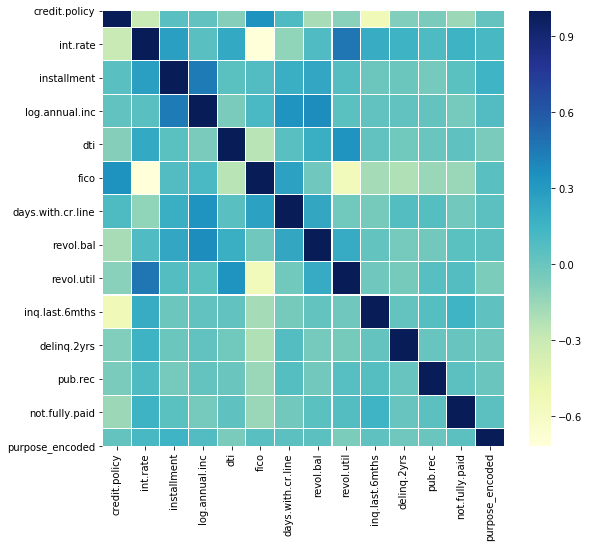

In [21]:
#Correlation Matrix

corrmat1 = loans.corr() 

print(corrmat1)
  
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat1, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

In [22]:
# Feature matrix in a object named X
features = ['credit.policy','int.rate','installment','log.annual.inc','dti','fico','days.with.cr.line','revol.bal','revol.util','inq.last.6mths','delinq.2yrs','pub.rec','purpose_encoded']
X = loans[features]

# Response vector in a object named y
target = ['not.fully.paid']
y = loans[target]

In [23]:
print(X.shape)
print(y.shape)

(9578, 13)
(9578, 1)


In [24]:
# splitting the data into training and test sets (70:30)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, train_size = 0.7)

In [25]:
#shape of train and test objects
print(X_train.shape)
print(X_test.shape)

(6704, 13)
(2874, 13)


In [26]:
# shape of new y objects
print(y_train.shape)
print(y_test.shape)

(6704, 1)
(2874, 1)


<h2> Algorithms

In [27]:
#installing xgboost

pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [28]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor

<h4> Base Models

In [29]:
#XGB Classifier
xgb_clf = XGBClassifier(objective="binary:logistic",
                            learning_rate=0.03,
                            n_estimators=500,
                            max_depth=1,
                            subsample=0.4,
                            random_state=123)

#Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=300,
                                max_features="sqrt",
                                criterion="gini",
                                min_samples_leaf=5)

#Gradient Boosting Regressor
gb_clf = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, random_state =5)


<h4> Defining a strategy for Cross Validation

In [38]:
#Validation function
from sklearn.model_selection import KFold, cross_val_score


def rmsle_cv(model, n_folds):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    rmse[i]= np.sqrt(-cross_val_score(model, X_train, y_train.values.ravel(), scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

<h4> Base Model Scores

In [70]:
#Gradient Boosting Algorithm
n_folds = [3,5,7]
mean_list = []
std_list = []

for i in n_folds:
    score = rmsle_cv(gb_clf, i)
    print("\nGradient score for n_fold = {:.0f} : {:.4f} ({:.4f})\n".format( i, score[i].mean(), score[i].std()))
    mean_list.append(score[i].mean())
    std_list.append(score[i].std())


Gradient score for n_fold = 3 : 0.3839 (0.0012)


Gradient score for n_fold = 5 : 0.3822 (0.0108)


Gradient score for n_fold = 7 : 0.3814 (0.0090)



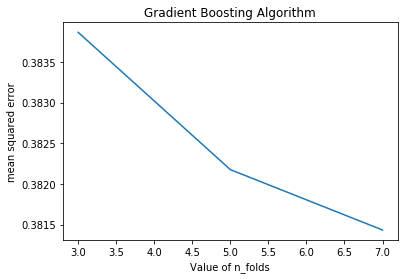

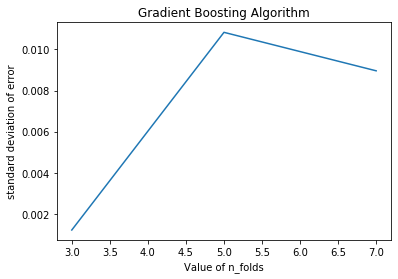

In [71]:
#Plotting a grapgh for Mean squared error and standard deviation of error - Gradient Boosting Algorithm
plt.plot(n_folds, mean_list)
plt.xlabel('Value of n_folds')
plt.ylabel('mean squared error')
plt.title('Gradient Boosting Algorithm')
plt.show()

plt.plot(n_folds, std_list)
plt.xlabel('Value of n_folds')
plt.ylabel('standard deviation of error')
plt.title('Gradient Boosting Algorithm')
plt.show()

In [58]:
#XGBoost Algorithm
n_folds = [3,5,7]
mean_list = []
std_list = []

for i in n_folds:
    score = rmsle_cv(xgb_clf, i)
    print("\nXGB score for n_fold = {:.0f} : {:.4f} ({:.4f})\n".format( i, score[i].mean(), score[i].std()))
    mean_list.append(score[i].mean())
    std_list.append(score[i].std())


XGB score for n_fold = 3 : 0.4004 (0.0023)


XGB score for n_fold = 5 : 0.4012 (0.0025)


XGB score for n_fold = 7 : 0.4014 (0.0034)



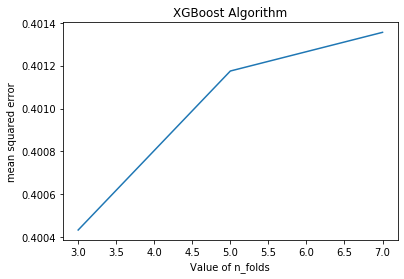

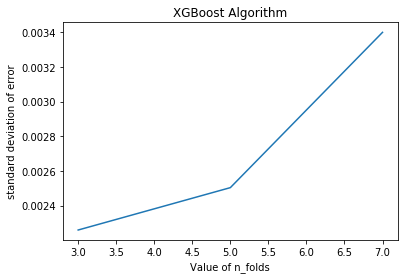

In [67]:
#Plotting a grapgh for Mean squared error and standard deviation of error - XGBoost Algorithm
plt.plot(n_folds, mean_list)
plt.xlabel('Value of n_folds')
plt.ylabel('mean squared error')
plt.title('XGBoost Algorithm')
plt.show()

plt.plot(n_folds, std_list)
plt.xlabel('Value of n_folds')
plt.ylabel('standard deviation of error')
plt.title('XGBoost Algorithm')
plt.show()

In [68]:
#Random Forest Algorithm
n_folds = [3,5,7]
mean_list = []
std_list = []

for i in n_folds:
    score = rmsle_cv(rf_clf, i)
    print("\nRandom Forest score for n_fold = {:.0f} : {:.4f} ({:.4f})\n".format( i, score[i].mean(), score[i].std()))
    mean_list.append(score[i].mean())
    std_list.append(score[i].std())


Random Forest score for n_fold = 3 : 0.4008 (0.0005)


Random Forest score for n_fold = 5 : 0.4004 (0.0008)


Random Forest score for n_fold = 7 : 0.4008 (0.0010)



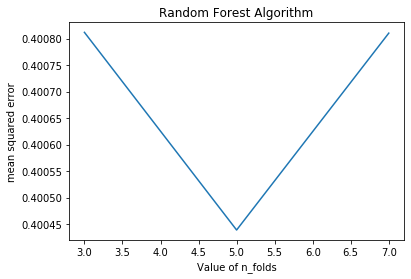

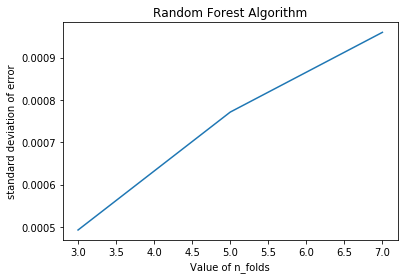

In [69]:
#Plotting a grapgh for Mean squared error and standard deviation of error - Random Forest Algorithm
plt.plot(n_folds, mean_list)
plt.xlabel('Value of n_folds')
plt.ylabel('mean squared error')
plt.title('Random Forest Algorithm')
plt.show()

plt.plot(n_folds, std_list)
plt.xlabel('Value of n_folds')
plt.ylabel('standard deviation of error')
plt.title('Random Forest Algorithm')
plt.show()

<h3>Stacking Models

In [49]:
from sklearn.base import BaseEstimator
from sklearn.base import RegressorMixin
from sklearn.base import TransformerMixin
from sklearn.base import clone

<h4>Approach : Averaging Base Models

In [50]:
#Averaging Models

class AveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)
        return self
    
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)

In [73]:
#n_folds=3 shows least errors in all the three base learners above.

averaged_models = AveragedModels(models = (rf_clf, xgb_clf, gb_clf))

score = rmsle_cv(averaged_models, 3)
print(" Averaged base models score for n_fold = 3: {:.4f} ({:.4f})\n".format(score[3].mean(), score[3].std()))

 Averaged base models score for n_fold = 3: 0.3839 (0.0012)

